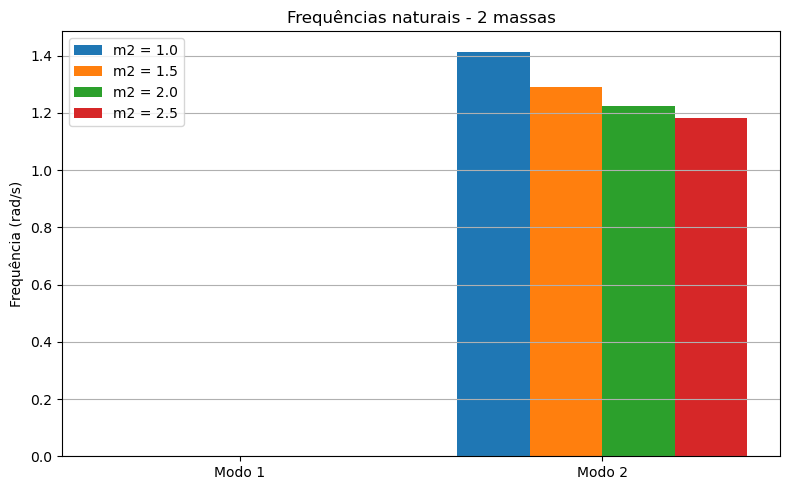


Sistema com 3 massas (m1 = 1.0, m2 = 1.5, m3 = 2.0)
Frequências naturais (rad/s): [4.98928987e-09 8.39444075e-01 1.45899519e+00]
Modos normais:
 [[ 0.57735027  0.78865321  0.64631215]
 [ 0.57735027  0.23291583 -0.72947118]
 [ 0.57735027 -0.56901347  0.22394731]]


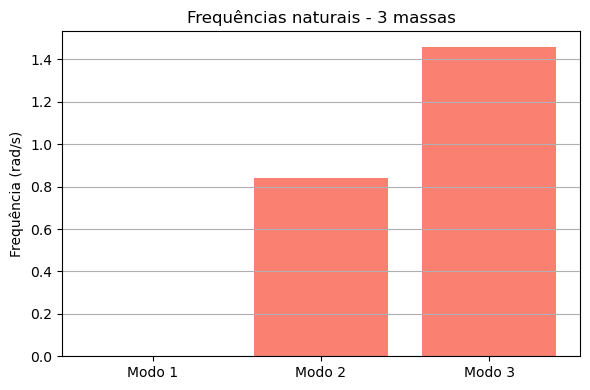


Sistema com 4 massas SEM segunda vizinhança
Frequências naturais (rad/s): [8.25116468e-09 6.45694666e-01 1.19711893e+00 1.62787735e+00]
Modos normais:
 [[ 0.5         0.72041457 -0.59695722 -0.46286056]
 [ 0.5         0.42005817  0.25853843  0.76371282]
 [ 0.5        -0.09045581  0.66942232 -0.43830652]
 [ 0.5        -0.54440033 -0.35871119  0.10193248]]

Sistema com 4 massas COM segunda vizinhança (k' = 0.5)
Frequências naturais (rad/s): [1.05367121e-08 9.75892666e-01 1.46838230e+00 1.70043728e+00]
Modos normais:
 [[ 0.5         0.70273362  0.61127412  0.48202539]
 [ 0.5         0.3467648  -0.02933165 -0.82192885]
 [ 0.5         0.07615136 -0.74350753  0.30239362]
 [ 0.5        -0.61653921  0.26959258  0.0253494 ]]


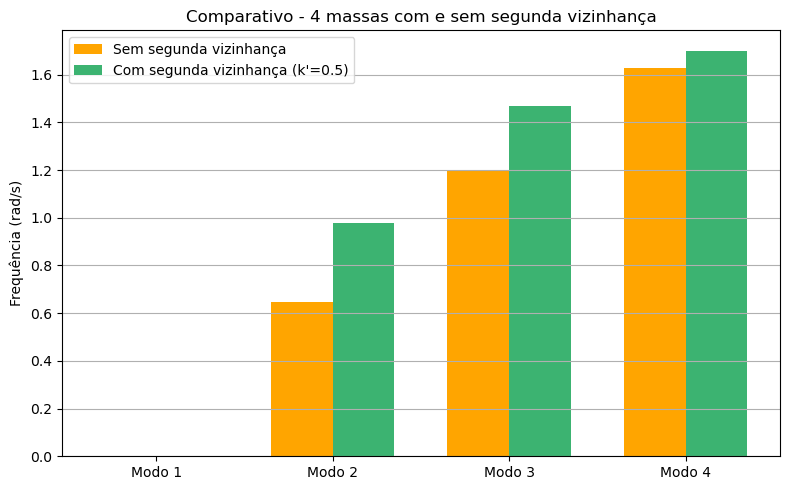

In [1]:
# Sistemas de 2, 3 e 4 massas ligadas por molas
# Importações
import numpy as np
import matplotlib.pyplot as plt

# Funções para montagem das matrizes

def construir_matrizes_2_massa(m1, m2, k):
    M = np.diag([m1, m2])
    K = np.array([[ k, -k],
                  [-k,  k]])
    return M, K

def construir_matrizes_3_massa(m1, m2, m3, k):
    M = np.diag([m1, m2, m3])
    K = np.array([[ k, -k,  0],
                  [-k, 2*k, -k],
                  [ 0, -k,  k]])
    return M, K

def construir_matrizes_4_massa_com_segunda_viz(m1, m2, m3, m4, k, k2):
    M = np.diag([m1, m2, m3, m4])
    K = np.zeros((4, 4))

    # Primeira vizinhança (constante k)
    K[0, 0] += k
    K[0, 1] += -k
    K[1, 0] += -k
    K[1, 1] += 2*k
    K[1, 2] += -k
    K[2, 1] += -k
    K[2, 2] += 2*k
    K[2, 3] += -k
    K[3, 2] += -k
    K[3, 3] += k

    # Segunda vizinhança (constante k2)
    K[0, 2] += -k2
    K[2, 0] += -k2
    K[0, 0] += k2
    K[2, 2] += k2

    K[1, 3] += -k2
    K[3, 1] += -k2
    K[1, 1] += k2
    K[3, 3] += k2

    return M, K

# Cálculo de frequências e modos
def calcular_frequencias_modos(M, K):
    eigvals, eigvecs = np.linalg.eig(np.linalg.inv(M) @ K)
    idx = np.argsort(eigvals)
    omegas = np.sqrt(np.abs(eigvals[idx]))
    modos = eigvecs[:, idx]
    return omegas, modos

# Parte 1: 2 massas
k = 1.0
m1 = 1.0
massa_variadas = [1.0, 1.5, 2.0, 2.5]
resultados_2m = {}

for m2 in massa_variadas:
    M, K = construir_matrizes_2_massa(m1, m2, k)
    omegas, modos = calcular_frequencias_modos(M, K)
    resultados_2m[m2] = omegas

# Gráfico 2 massas
labels = ["Modo 1", "Modo 2"]
x = np.arange(len(labels))
width = 0.2

plt.figure(figsize=(8, 5))
for i, m2 in enumerate(massa_variadas):
    omegas = resultados_2m[m2]
    plt.bar(x + i*width, omegas, width=width, label=f"m2 = {m2}")

plt.xticks(x + width * (len(massa_variadas)-1)/2, labels)
plt.ylabel("Frequência (rad/s)")
plt.title("Frequências naturais - 2 massas")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Parte 2: 3 massas
m1, m2, m3 = 1.0, 1.5, 2.0
M3, K3 = construir_matrizes_3_massa(m1, m2, m3, k)
omegas3, modos3 = calcular_frequencias_modos(M3, K3)

print("\nSistema com 3 massas (m1 = 1.0, m2 = 1.5, m3 = 2.0)")
print("Frequências naturais (rad/s):", omegas3)
print("Modos normais:\n", modos3)

plt.figure(figsize=(6, 4))
plt.bar(["Modo 1", "Modo 2", "Modo 3"], omegas3, color='salmon')
plt.title("Frequências naturais - 3 massas")
plt.ylabel("Frequência (rad/s)")
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()

# Parte 3: 4 massas com e sem segunda vizinhança
m1, m2, m3, m4 = 1.0, 1.2, 1.5, 2.0

# Sem segunda vizinhança (k2 = 0)
k2_0 = 0.0
M4_0, K4_0 = construir_matrizes_4_massa_com_segunda_viz(m1, m2, m3, m4, k, k2_0)
omegas4_0, modos4_0 = calcular_frequencias_modos(M4_0, K4_0)

# Com segunda vizinhança (k2 = 0.5)
k2_1 = 0.5
M4_1, K4_1 = construir_matrizes_4_massa_com_segunda_viz(m1, m2, m3, m4, k, k2_1)
omegas4_1, modos4_1 = calcular_frequencias_modos(M4_1, K4_1)

print("\nSistema com 4 massas SEM segunda vizinhança")
print("Frequências naturais (rad/s):", omegas4_0)
print("Modos normais:\n", modos4_0)

print("\nSistema com 4 massas COM segunda vizinhança (k' = 0.5)")
print("Frequências naturais (rad/s):", omegas4_1)
print("Modos normais:\n", modos4_1)

# Gráfico comparativo
labels = ["Modo 1", "Modo 2", "Modo 3", "Modo 4"]
x = np.arange(len(labels))
width = 0.35

plt.figure(figsize=(8, 5))
plt.bar(x - width/2, omegas4_0, width=width, label="Sem segunda vizinhança", color='orange')
plt.bar(x + width/2, omegas4_1, width=width, label="Com segunda vizinhança (k'=0.5)", color='mediumseagreen')

plt.xticks(x, labels)
plt.ylabel("Frequência (rad/s)")
plt.title("Comparativo - 4 massas com e sem segunda vizinhança")
plt.legend()
plt.grid(True, axis='y')
plt.tight_layout()
plt.show()
